In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading  dataset
df = pd.read_csv('Sustainable_GlobalEnrgy.csv')
#Displaying Alldata
#print(df)
#df.head()

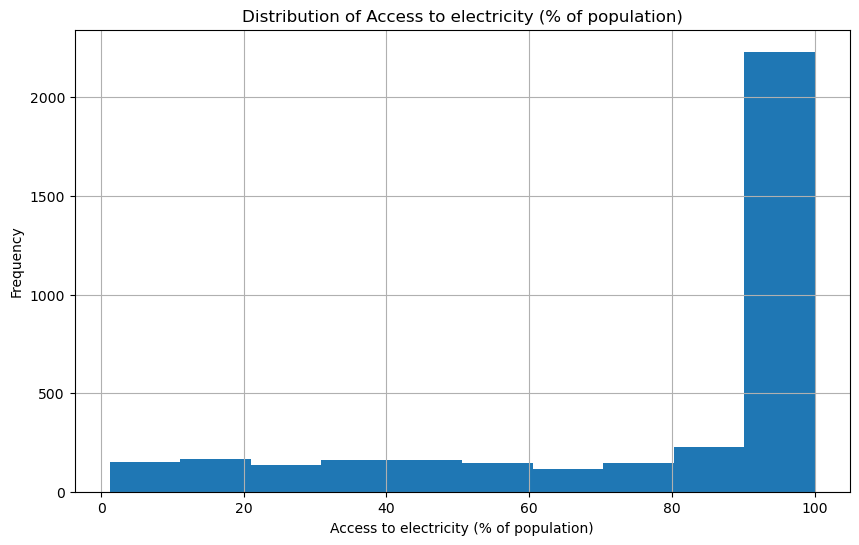

In [3]:
#shwing histogrm of spcfc clmn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

clean_data = pd.read_csv('Sustainable_GlobalEnrgy.csv')
column_name = 'Access to electricity (% of population)'
clean_data[column_name].hist(figsize=(10, 6))
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

In [1]:
# No:1 statistics

## 2 histogram---shwmajorfeatrofdata
##df.hist(figsize=(40, 60))
##plt.tight_layout()
##plt.show()


In [2]:
#summary statistics

import pandas as pd


df = pd.read_csv('Sustainable_GlobalEnrgy.csv')

summary_statistics = df.describe()
print(summary_statistics)

              Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-genera

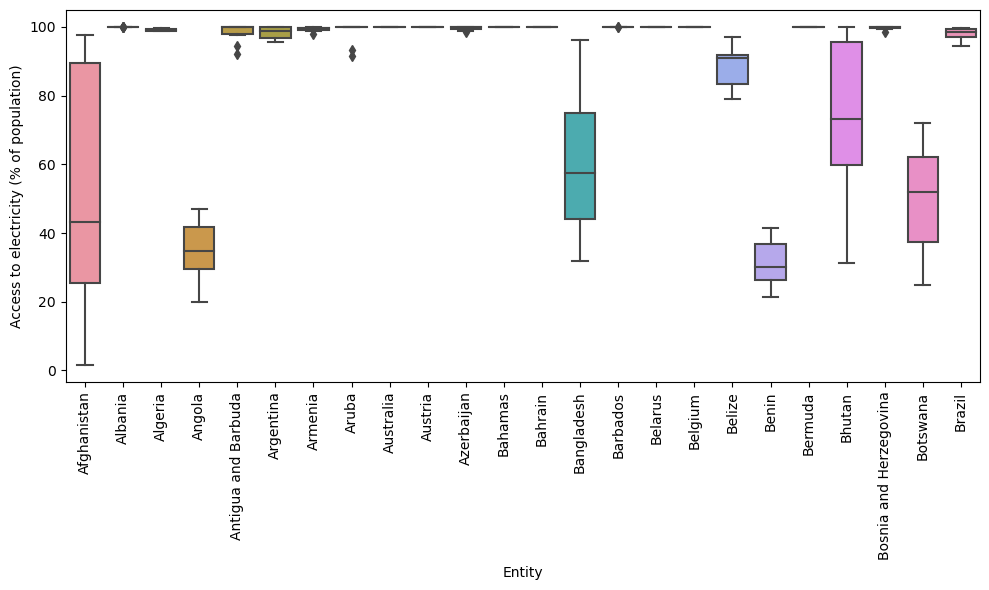

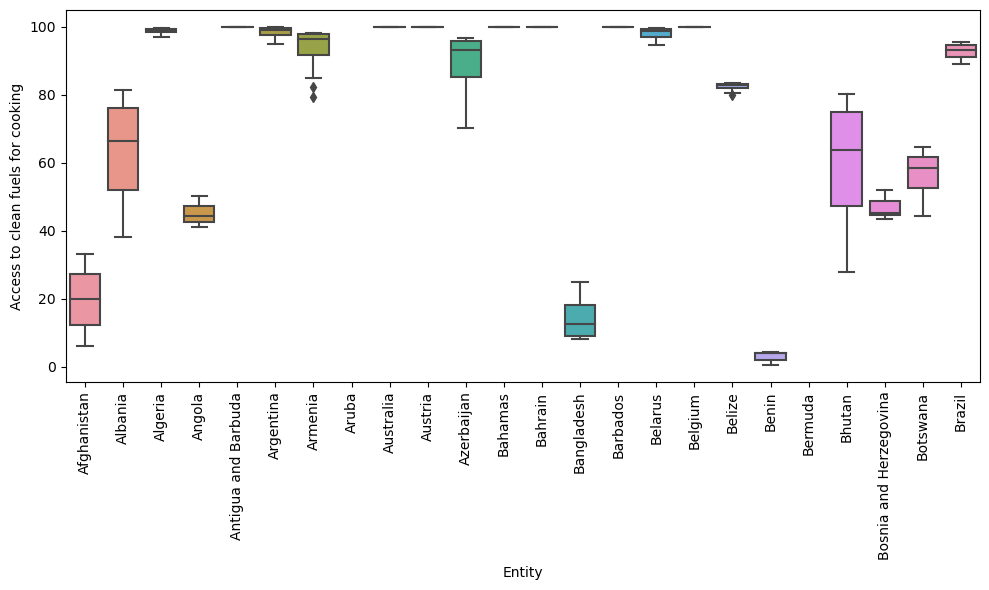

In [8]:
# 3--- box plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Sustainable_GlobalEnrgy.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Entity', y=df['Access to electricity (% of population)'], data=df.head(500))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Entity', y='Access to clean fuels for cooking', data=df.head(500))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

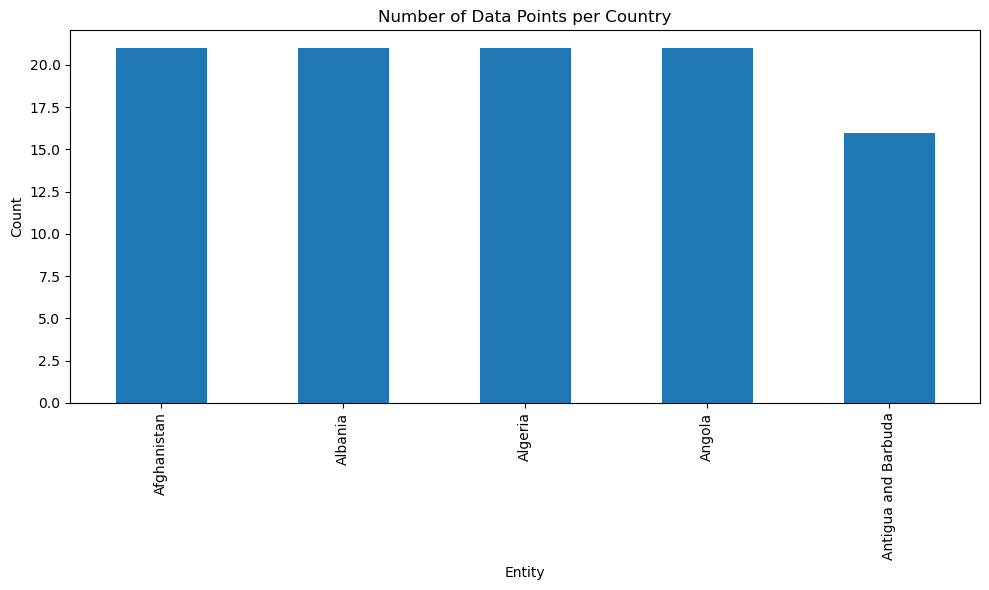

In [15]:
# 4. bar charts
plt.figure(figsize=(10, 6))
df.head(100)['Entity'].value_counts().plot(kind='bar')
plt.xlabel('Entity')
plt.ylabel('Count')
#no of data info
plt.title('Number of Data Points per Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The country with the highest combined measure of renewable energy per capita and share of renewable energy is: Bhutan


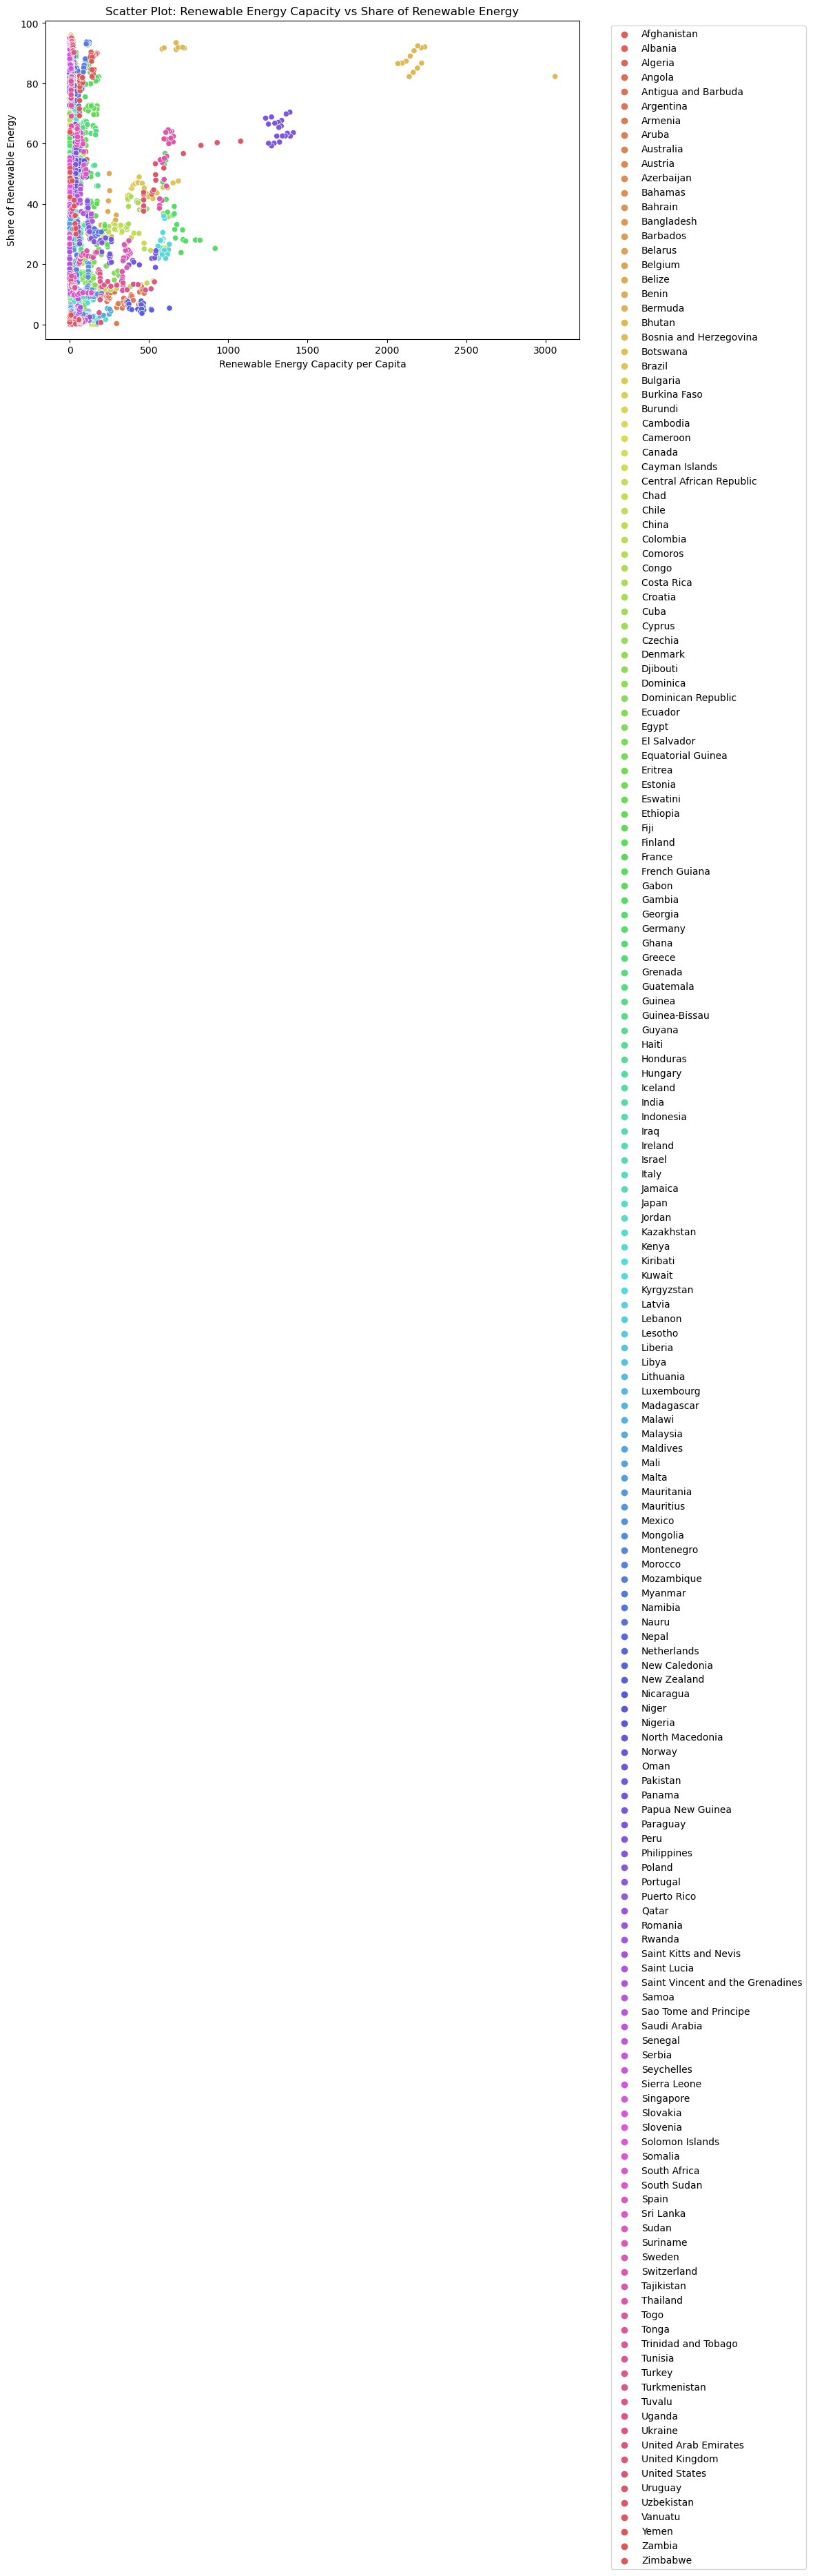

In [15]:
# 5. scatter plots
plt.figure(figsize=(10, 6))
palette = sns.color_palette('hls', n_colors=len(df['Entity'].unique()))
sns.scatterplot(x='Renewable-electricity-generating-capacity-per-capita', y='Renewable energy share in the total final energy consumption (%)', hue='Entity', data=df, palette=palette)

plt.xlabel('Renewable Energy Capacity per Capita')
plt.ylabel('Share of Renewable Energy')
plt.title('Scatter Plot: Renewable Energy Capacity vs Share of Renewable Energy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

df['Renewable_product'] = df['Renewable-electricity-generating-capacity-per-capita'] * df['Renewable energy share in the total final energy consumption (%)']

# fnding hghest renewable engry in cntries
max_combined_country = df.loc[df['Renewable_product'].idxmax()]['Entity']

print(f"The country with the highest combined measure of renewable energy per capita and share of renewable energy is: {max_combined_country}")

plt.show()

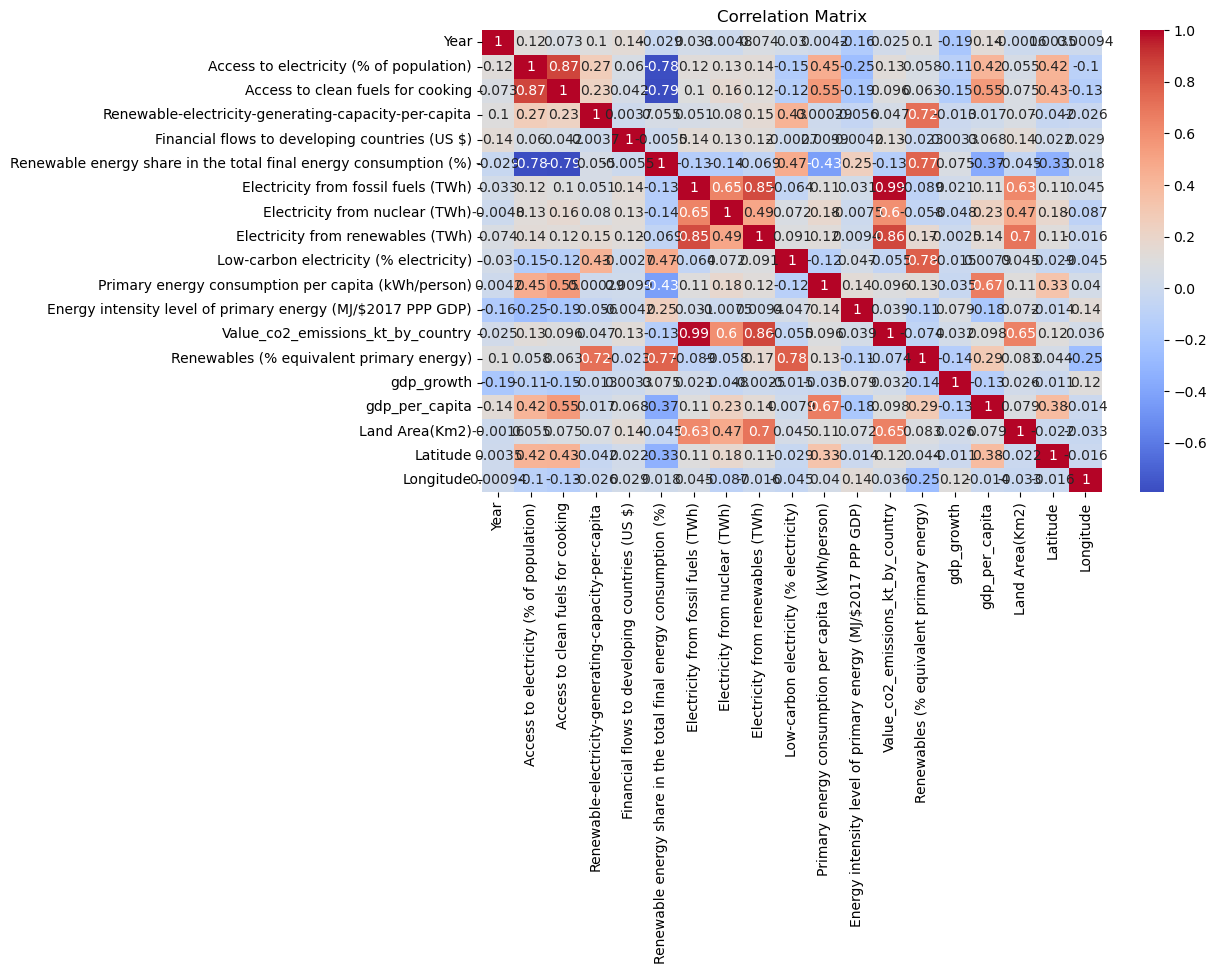

In [63]:
# 6--- correlation matrix    

numericOnlyData = df.select_dtypes(include=['number'])
correlation_matrix = numericOnlyData.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
#plt.tight_layout()
plt.show()

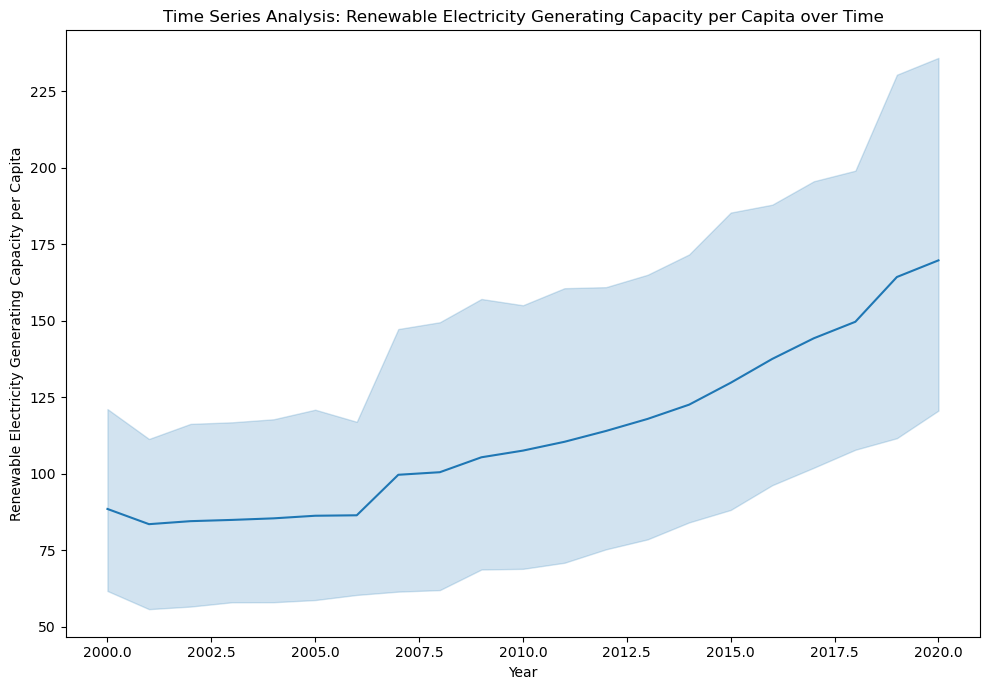

In [9]:
# 7-- time series analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='Renewable-electricity-generating-capacity-per-capita', data=df)
plt.xlabel('Year')
plt.ylabel('Renewable Electricity Generating Capacity per Capita')
plt.title('Time Series Analysis: Renewable Electricity Generating Capacity per Capita over Time')
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


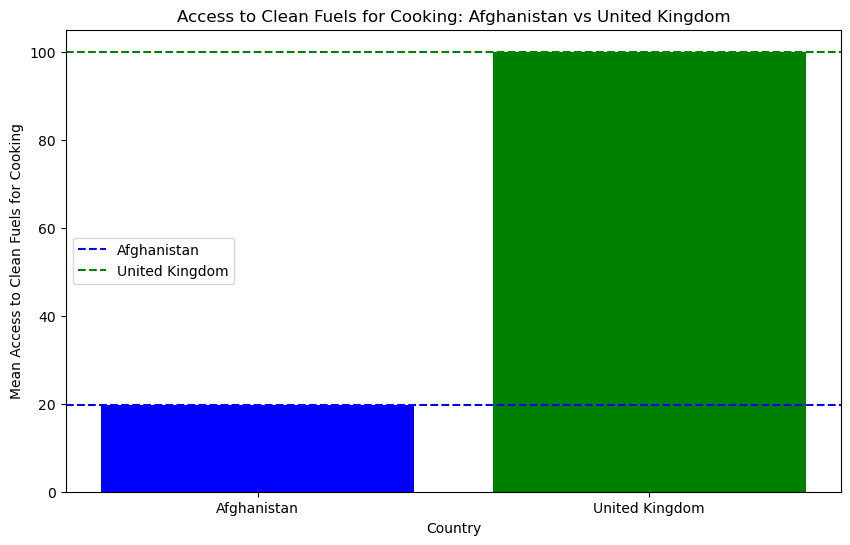

Hypothesis Testing - Access to Clean Fuels for Cooking:
T-Statistic: -41.747564591499895
P-Value: 1.3235657210664074e-34


In [17]:
#ttest forv access to clean fuel for cooking

from scipy import stats
import warnings



# choosing two specific countries
country1 = 'Afghanistan'
country2 = 'United Kingdom'

# getting access to clean fuels for cooking data 2countries
access_country1 = df[df['Entity'] == country1]['Access to clean fuels for cooking']
access_country2 = df[df['Entity'] == country2]['Access to clean fuels for cooking']

# calculating means
mean_access_country1 = access_country1.mean()
mean_access_country2 = access_country2.mean()

# performiing t-test
t_stat, p_value = stats.ttest_ind(access_country1, access_country2)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    t_stat, p_value = stats.ttest_ind(access_country1, access_country2)


# plotting
plt.figure(figsize=(10, 6))
plt.bar([country1, country2], [mean_access_country1, mean_access_country2], color=['blue', 'green'])
plt.xlabel('Country')
plt.ylabel('Mean Access to Clean Fuels for Cooking')
plt.title('Access to Clean Fuels for Cooking: {} vs {}'.format(country1, country2))
plt.axhline(y=mean_access_country1, color='blue', linestyle='--', label=country1)
plt.axhline(y=mean_access_country2, color='green', linestyle='--', label=country2)
plt.legend()
plt.show()


# displaying hypothesis test results
print("Hypothesis Testing - Access to Clean Fuels for Cooking:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

#getting warning data being identical etc

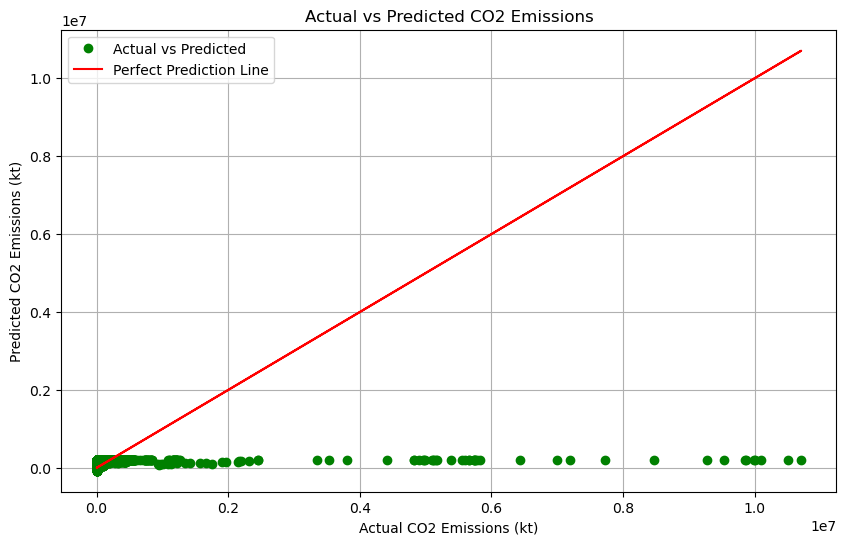

In [15]:
#regression model

import statsmodels.api as sm

# droping rows with null values incolumns
df_cleaned = df.dropna(subset=['gdp_growth', 'Value_co2_emissions_kt_by_country', 'Renewable-electricity-generating-capacity-per-capita', 'Access to electricity (% of population)'])

# preparing predictor(x) and outcome(Y) variables for regression
X = df_cleaned[['Renewable-electricity-generating-capacity-per-capita', 'Access to electricity (% of population)']]
y = df_cleaned['Value_co2_emissions_kt_by_country']

# adding constant term to predictor variables
X = sm.add_constant(X)

# fittng regression model
model = sm.OLS(y, X).fit()

# geting predicted values
predicted_values = model.predict(X)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(y, predicted_values, 'o', color='green', label='Actual vs Predicted')
#plt.plot(y, predicted_values, 'o', color='skyblue', alpha=0.5, label='Predictor Line')

#plt.plot(y, y, color='green', alpha=1, label='Actual Line')

plt.plot(y, y, color='red', label='Perfect Prediction Line')
plt.xlabel('Actual CO2 Emissions (kt)')
plt.ylabel('Predicted CO2 Emissions (kt)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()

# printing summary of the regression model
#print("\nRegression Analysis for Carbon Emissions:")
#print(model.summary())


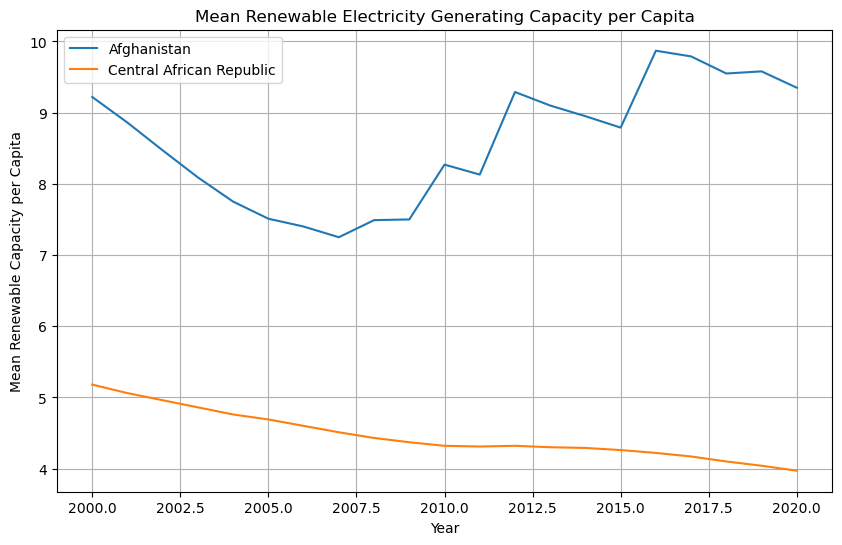

In [17]:
#analysis of variance(dffrnce amng mean renewable cap per capita btw 2cntry)
# choosing two specific countries
country1 = 'Afghanistan'
country2 = 'Central African Republic'


# droping rows with null values  incolumns
df_cleaned = df.dropna(subset=['gdp_growth', 'Value_co2_emissions_kt_by_country'])

# getting data for the two countries
data_country1 = df[df['Entity'] == country1][['Year', 'Renewable-electricity-generating-capacity-per-capita']]
data_country2 = df[df['Entity'] == country2][['Year', 'Renewable-electricity-generating-capacity-per-capita']]

# grouping by year and calculating mean renewable capacity per capita for each country
mean_renewable_capacity_country1 = data_country1.groupby('Year')['Renewable-electricity-generating-capacity-per-capita'].mean()
mean_renewable_capacity_country2 = data_country2.groupby('Year')['Renewable-electricity-generating-capacity-per-capita'].mean()

# plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_renewable_capacity_country1, label=country1)
plt.plot(mean_renewable_capacity_country2, label=country2)
plt.title('Mean Renewable Electricity Generating Capacity per Capita')
plt.xlabel('Year')
plt.ylabel('Mean Renewable Capacity per Capita')
plt.legend()3
plt.grid(True)
plt.show()


T-Test for Renewable Energy Capacity between Developed and Developing Countries:
T-Statistic: 8.474276046876689
P-Value: 4.006494235886199e-17

T-Test for Access to Electricity between Developed and Developing Countries:
T-Statistic: 45.2470851512049
P-Value: 0.0


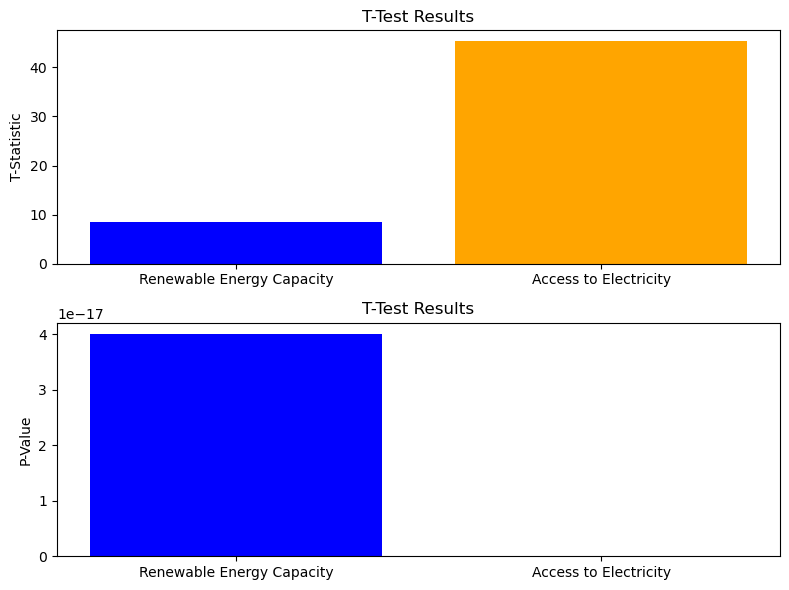

In [9]:

#ttest to compare renewable energy capacity per capita and access to electricity between 
#developed and developing countries

from scipy import stats
import warnings

# droping rows with null values in relevant columns
df_cleaned = df.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Access to electricity (% of population)', 'gdp_per_capita'])

# calculating median gdp per capita
median_gdp_per_capita = df_cleaned['gdp_per_capita'].median()

#######
developed_status = 'Developed'
developing_status = 'Developing'

### mking copy 
df_cleaned = df.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Access to electricity (% of population)', 'gdp_per_capita']).copy()


# assigning 'Development Status' bsd on gdp per capita
#df_cleaned['Development Status'] = df_cleaned['gdp_per_capita'].apply(lambda x: developed_status if x > median_gdp_per_capita else developing_status)
df_cleaned.loc[:, 'Development Status'] = df_cleaned['gdp_per_capita'].apply(lambda x: developed_status if x > median_gdp_per_capita else developing_status)

# printing entities with classifications
#print("Developed Countries:")
#print(df_cleaned[df_cleaned['Development Status'] == 'Developed']['Entity'])

#print("\nDeveloping Countries:")
#print(df_cleaned[df_cleaned['Development Status'] == 'Developing']['Entity'])

# gtting--renewElctrgenertCapPerCap data for developed and developing countries
developed_renewable_capacity = df_cleaned[df_cleaned['Development Status'] == 'Developed']['Renewable-electricity-generating-capacity-per-capita']
developing_renewable_capacity = df_cleaned[df_cleaned['Development Status'] == 'Developing']['Renewable-electricity-generating-capacity-per-capita']

# performing t-test for renewable energy capacity between developed and developing countries
t_stat, p_value = stats.ttest_ind(developed_renewable_capacity, developing_renewable_capacity)

print("\nT-Test for Renewable Energy Capacity between Developed and Developing Countries:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# gtting--accsstoElctrcity% data for dvlpd and dvlpng cntries
developed_access_to_electricity = df_cleaned[df_cleaned['Development Status'] == 'Developed']['Access to electricity (% of population)']
developing_access_to_electricity = df_cleaned[df_cleaned['Development Status'] == 'Developing']['Access to electricity (% of population)']

# performing t-test for access to electricity btw dvlpd and dvlpng cntries
t_stat_electricity, p_value_electricity = stats.ttest_ind(developed_access_to_electricity, developing_access_to_electricity)

print("\nT-Test for Access to Electricity between Developed and Developing Countries:")
print("T-Statistic:", t_stat_electricity)
print("P-Value:", p_value_electricity)
import matplotlib.pyplot as plt

# data for plotting
t_statistics = [t_stat, t_stat_electricity]
p_values = [p_value, p_value_electricity]
labels = ['Renewable Energy Capacity', 'Access to Electricity']

# plotting
plt.figure(figsize=(8, 6))

# bar plot for T-statistics
plt.subplot(2, 1, 1)
plt.bar(labels, t_statistics, color=['blue', 'orange'])
plt.title('T-Test Results')
plt.ylabel('T-Statistic')

# bar plot for P-values
plt.subplot(2, 1, 2)
plt.bar(labels, p_values, color=['blue', 'orange'])
plt.title('T-Test Results')
plt.ylabel('P-Value')

plt.tight_layout()
plt.show()


In [11]:

#gettingDevDevlpngCountries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings

# droping rows with null values in relevant columns
df_cleaned = df.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Access to electricity (% of population)', 'gdp_per_capita'])


median_gdp_per_capita = df_cleaned['gdp_per_capita'].median()

# cnsdrgdp per capita above the median will be 'Developed'rest wllbe developing
developed_countries = df_cleaned[df_cleaned['gdp_per_capita'] > median_gdp_per_capita]
developing_countries = df_cleaned[df_cleaned['gdp_per_capita'] <= median_gdp_per_capita]

print("Developed")
print(len(developed_countries))
print("Developing")
print(len(developing_countries))
#print(len(df['Entity']))


Developed
1234
Developing
1235


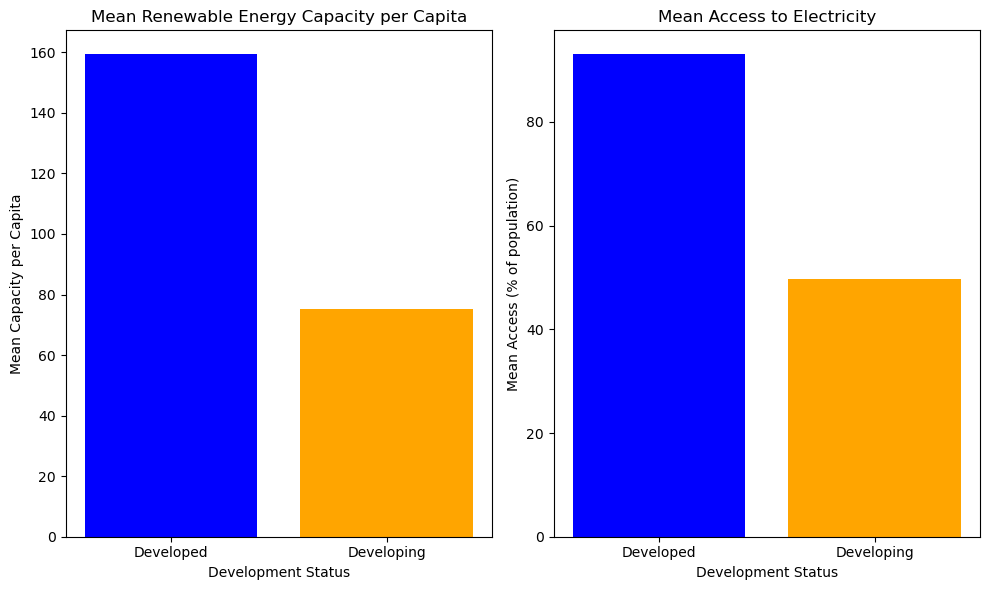

In [12]:

# data for plotting
means_renewable_capacity = [developed_renewable_capacity.mean(), developing_renewable_capacity.mean()]
means_access_to_electricity = [developed_access_to_electricity.mean(), developing_access_to_electricity.mean()]

# labels for bars
labels = ['Developed', 'Developing']

# plotting
plt.figure(figsize=(10, 6))

# bar plot for renewable energy capacity per capita
plt.subplot(1, 2, 1)
plt.bar(labels, means_renewable_capacity, color=['blue', 'orange'])
plt.title('Mean Renewable Energy Capacity per Capita')
plt.xlabel('Development Status')
plt.ylabel('Mean Capacity per Capita')

# bar plot for access to electricity
plt.subplot(1, 2, 2)
plt.bar(labels, means_access_to_electricity, color=['blue', 'orange'])
plt.title('Mean Access to Electricity')
plt.xlabel('Development Status')
plt.ylabel('Mean Access (% of population)')

plt.tight_layout()
plt.show()


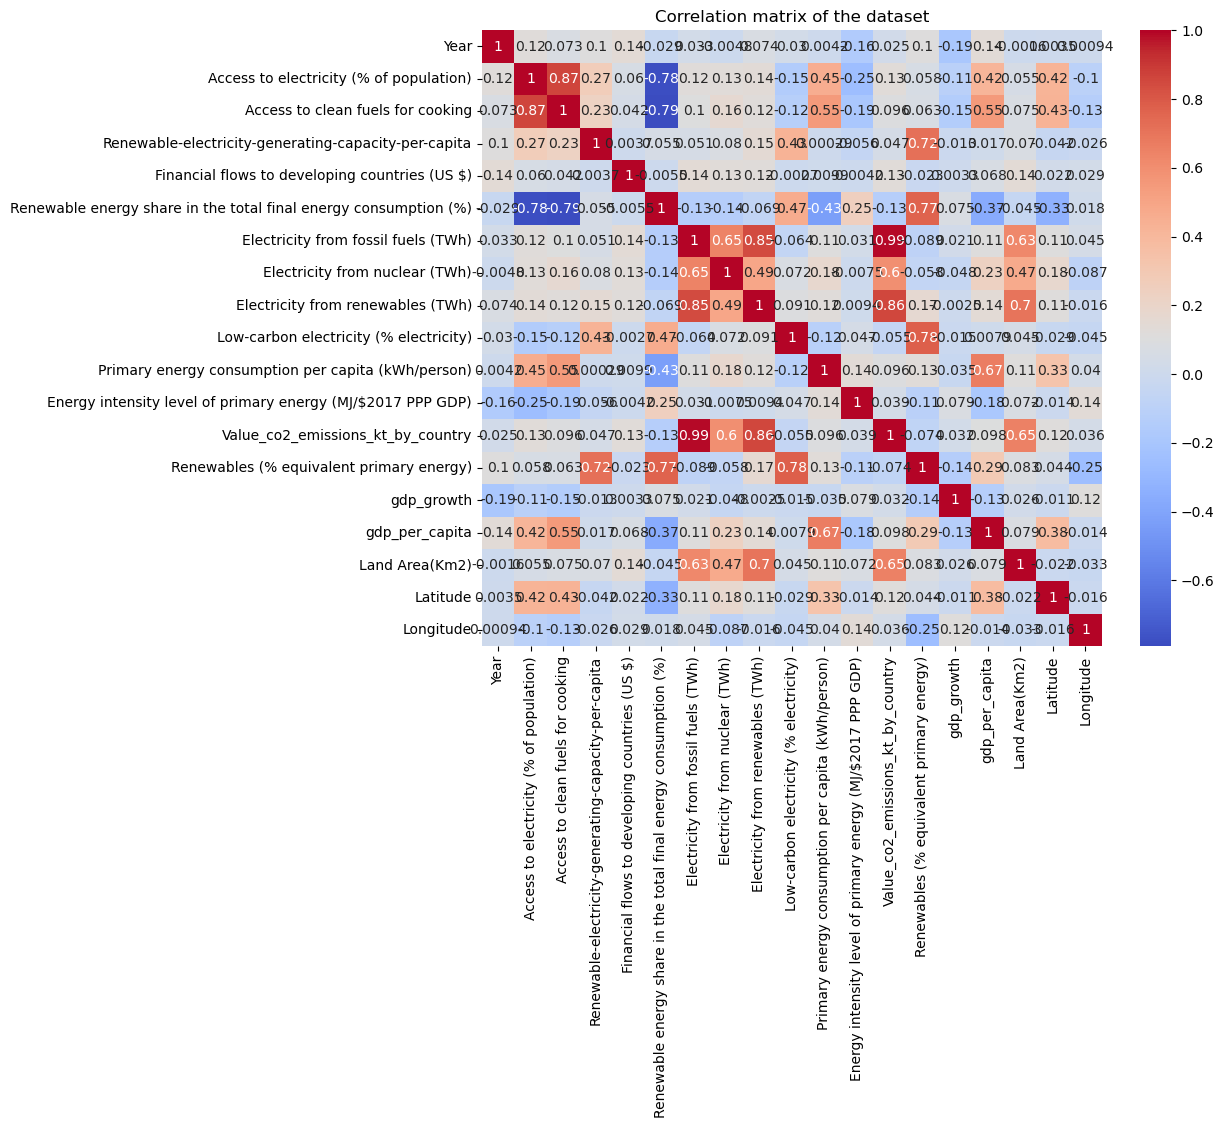

Decision Tree Regression score: 0.9389351328315386
First 5 predictions:
Test observation 1406: 2100.00
Test observation 3598: 20020.00
Test observation 3646: 10050.00
Test observation 3230: 14430.00
Test observation 3114: 269269.99
Decision Tree Regression score: 0.9389351328315386


In [17]:
#Decision Tree Regression Analysis Part 1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# dataset loadng
df = pd.read_csv('Sustainable_GlobalEnrgy.csv')
#column_medians = df.median()
 # Selectng numeric columnsOnlky
numeric_cols = df.select_dtypes(include=[np.number]) 

column_medians = numeric_cols.median()

df.fillna(column_medians, inplace=True)

#filling null values with medians for both x and y
nan_values_X = math.floor(df['Electricity from fossil fuels (TWh)'].median())

df['Electricity from fossil fuels (TWh)'] = df['Electricity from fossil fuels (TWh)'].fillna(nan_values_X)


nan_values_y = math.floor(df['Electricity from renewables (TWh)'].median())

df['Electricity from renewables (TWh)'] = df['Electricity from renewables (TWh)'].fillna(nan_values_y)


nan_values = df[['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)']].isna().sum()
nan_values


#correlation matrix
corr_matrix = numeric_cols.corr()
target_corr = corr_matrix["Value_co2_emissions_kt_by_country"]

top_corr_features = target_corr.abs().sort_values(ascending=False)[:10].index.tolist()

# top10 features with the highest correlation coefficient
#print("Top 10 features with the highest correlation coefficient:")
#print(top_corr_features)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of the dataset")
plt.show()


X = df[['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)']] 

y = df['Value_co2_emissions_kt_by_country'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performng Decision Tree Regression
model = DecisionTreeRegressor()

nan_values 

model.fit(X_train, y_train)
# Predictng using the test data
predictions = model.predict(X_test)

# Evaluatng the model
score = model.score(X_test, y_test)
print(f'Decision Tree Regression score: {score}')
print("First 5 predictions:")
for index, prediction in enumerate(predictions[:5]):
    print(f"Test observation {X_test.index[index]}: {prediction:.2f}")
# Evaluatng the model
y_test = y_test.values
score = model.score(X_test, y_test)
print(f'Decision Tree Regression score: {score}')   

Decision Tree Regression score: 0.9999967562610287
Root Mean Squared Error: 0.052475695613654776


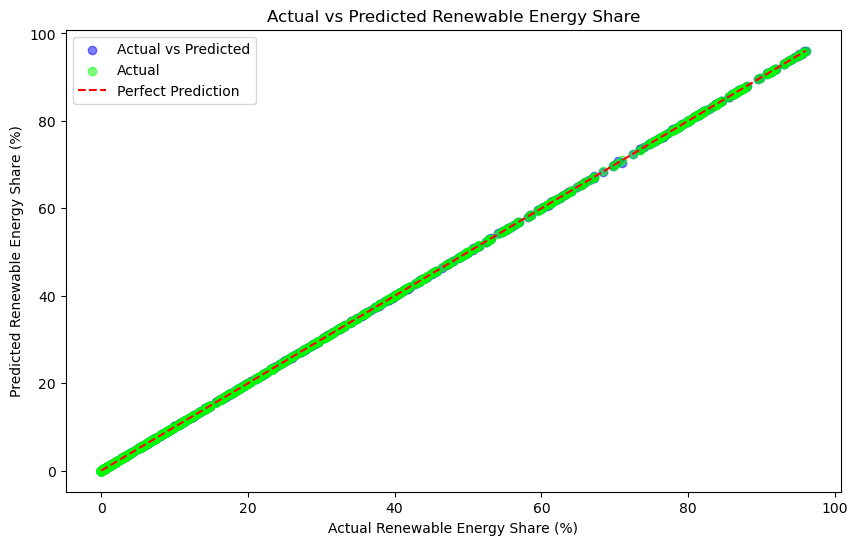

First 5 predictions:
Test observation 1406: 65.35
Test observation 3598: 1.10
Test observation 3646: 80.27
Test observation 3230: 64.02
Test observation 3114: 14.77
Decision Tree Regression score: 0.9999967562610287
Root Mean Squared Error: 0.052475695613654776
the predicted value for 2030 is :[44.94]


In [2]:
#Part 2 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv('Sustainable_GlobalEnrgy.csv')

# Selectng columns related to sustainable energy
sustainable_energy_columns = [
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from renewables (TWh)',
    'Renewables (% equivalent primary energy)'
]

# Preparng the dataset for regression
X = df[sustainable_energy_columns]
#tarVar
y = df['Renewable energy share in the total final energy consumption (%)']

# Fillng null values with median
X = X.fillna(X.median())
y = y.fillna(y.median())

# Splitng the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performng Decision Tree Regression
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predictng using the test data
predictions = model.predict(X_test)

# Evaluatng the model
score = model.score(X_test, y_test)
print(f'Decision Tree Regression score: {score}')

# Calculatng the root mean squared error
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Visualizng actual vs predicted values with colors
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Actual vs Predicted')
plt.scatter(y_test, y_test, color=(0, 1, 0, 0.5), label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Renewable Energy Share (%)')
plt.ylabel('Predicted Renewable Energy Share (%)')
plt.title('Actual vs Predicted Renewable Energy Share')
plt.legend()
plt.show()


# Printng the first 5 predictions
print("First 5 predictions:")
for index, prediction in enumerate(predictions[:5]):
    print(f"Test observation {X_test.index[index]}: {prediction:.2f}")
# Evaluatng the model
y_test = y_test.values
score = model.score(X_test, y_test)
print(f'Decision Tree Regression score: {score}')

# Calculatng the root mean squared error
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')
feature_values_2030 = {
    'Renewable-electricity-generating-capacity-per-capita': 9.22,  # Example value, replace with actual value
    'Renewable energy share in the total final energy consumption (%)': 44.99,  # Example value, replace with actual value
    'Electricity from renewables (TWh)': 0.31,  # Example value, replace with actual value
    'Renewables (% equivalent primary energy)': 0  # Example value, replace with actual value
}

# Creatng a DataFrame for the year 2030
X_2030 = pd.DataFrame([feature_values_2030])

# Usng the trained model to predict the renewable energy share for the year 2030
predicted_share_2030 = model.predict(X_2030)

print (f"the predicted value for 2030 is :{predicted_share_2030}")

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 713860841472.0000 - val_loss: nan
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 491904335872.0000 - val_loss: nan
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 775323779072.0000 - val_loss: nan
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 607913181184.0000 - val_loss: nan
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 802647965696.0000 - val_loss: nan
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 880276930560.0000 - val_loss: nan
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 699579498496.0000 - val_loss: nan
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 613511004160.0000 - val_loss: nan
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 733364420608.0000 - val_loss: nan
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 673350418432.0000 - val_loss: nan
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/st

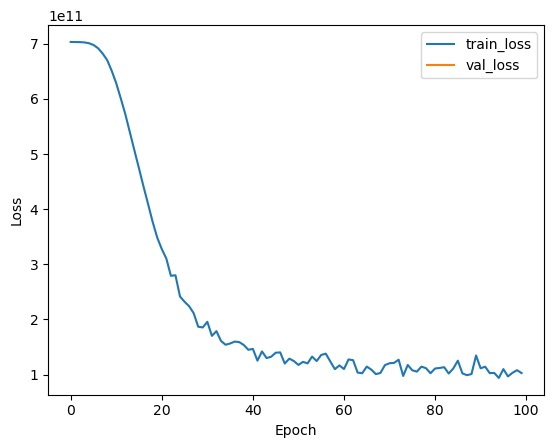

In [1]:
# Neural Network Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings

#  warningsIgnorng
warnings.filterwarnings("ignore")

# Loadng the dataset
df = pd.read_csv('Sustainable_GlobalEnrgy.csv')

# Fillng null values with the median of each column
#column_medians = df.median()
#selectng only numeric column
numeric_df = df.select_dtypes(include=[np.number])
column_medians = numeric_df.median()
df.fillna(column_medians, inplace=True)

X = df.drop(['Entity', 'Year','Access to clean fuels for cooking','Value_co2_emissions_kt_by_country'],axis='columns')
X=X.replace(',', '', regex=True)
# X = df[['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)','Electricity from nuclear (TWh)','Primary energy consumption per capita (kWh/person)']]
y = df['Value_co2_emissions_kt_by_country']

# Splitng the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizng the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increasng model complexity
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.3),  # Increase dropout rate for regularization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),  # Add another layer
    layers.Dense(1)
])

# Adjustng the learning rate and optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilng the model with the updated optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Trainnng the model with more epochs
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluatng the model
score = model.evaluate(X_test_scaled, y_test)
print(f'Neural Network Regression loss: {score}')

# Predictng using the test data
predictions = model.predict(X_test_scaled)

# Printngg the first 5 predictions
print("First 5 predictions:")
for index, prediction in enumerate(predictions[:5]):
    print(f"Test observation {index}: {prediction[0]:.2f}")

# Plotngggg training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
